In [ ]:
#These are my import statements

In [2]:
import numpy as np                                                                      
import matplotlib.pyplot as plt                                                         
import gizmo_analysis as gizmo                                                          
import utilities as ut                                                                  
import matplotlib.colors as colors 
from scipy import stats

In [ ]:
#This is loading in my data and defining some parameters

In [3]:
redshift = 0
simulation_directory = "/Users/micahoeur/Desktop/m12q.res57000"
part = gizmo.io.Read.read_snapshots(['star', 'gas', 'dark'], 'redshift', 0, simulation_directory, assign_hosts_rotation=True)

part['star'].prop('host.distance.principal.cylindrical')
rxyz = part['star'].prop('host.distance.total')
Rxy = part['star'].prop('host.distance.principal.cylindrical')[:,0]
phi = part['star'].prop('host.distance.principal.cylindrical')[:,1]
z = part['star'].prop('host.distance.principal.cylindrical')[:,2]
x = part['star'].prop('host.distance.principal.cartesian')[:,0]
y = part['star'].prop('host.distance.principal.cartesian')[:,1]
z = part['star'].prop('host.distance.principal.cartesian')[:,2]
vx = part['star'].prop('host.velocity.principal.cartesian')[:,0]
vy = part['star'].prop('host.velocity.principal.cartesian')[:,1]
vz = part['star'].prop('host.velocity.principal.cartesian')[:,2]
age = part['star'].prop('age')
mass = part['star'].prop('mass')
feh = part['star'].prop('metallicity.fe')


# in utilities.simulation.Snapshot():
* reading:  Users/micahoeur/Desktop/m12q.res57000/snapshot_times.txt

* input redshift = 0:  using snapshot index = 600, redshift = 0.000


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  Users/micahoeur/Desktop/m12q.res57000/output/snapshot_600.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 16220880 particles
    dark2     (id = 2): 4132251 particles
    gas       (id = 0): 12625997 particles
    star      (id = 4): 3839921 particles
    blackhole (id = 5): 0 particles

* reading species: ['star', 'gas', 'dark']
* reading particles from:
    Users/micahoeur/Desktop/m12q.res57000/output/snapshot_600.hdf5

* reading cosmological parameters from:  Users/micahoeur/Desktop/m12q.res57000/initial_condition/ic_agora_m12q.conf

* checking sanity of particle properties


# in gizmo_analysis.gizmo_track.ParticleCoordinate():
  read 1 host (position, velocity, rotation, axis ratios) from:  Users/micahoeur/Des

In [ ]:
#I want to centre my sun at R_gal=8kpc and consider the area around it out to 1kpc. Therefore, I define a "donut" of a swath 7kpc < R_gal < 9kpc that is swung about the galactic centre creating my solar annulus  

In [4]:
keep_donut = np.where((7 <= Rxy) & ( Rxy <= 9) & (z <= np.abs(1.5)))

In [ ]:
#relevant parameters: vz, z, and feh. Restrict these to my regime. How many points in my donut regime: 120196

In [5]:
vz_don = vz[keep_donut] 
z_don = z[keep_donut]
feh_don = feh[keep_donut]
print(len(z_don))

120196


In [ ]:
#This plots a histogram of vz_don and shows it

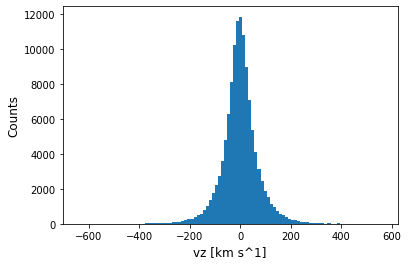

In [18]:
plt.hist(vz_don, bins=100)
plt.xlabel('vz [km s^1]', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.show()

In [ ]:
#We can set the range from -200 to 200 because that's where the bulk of the data is

In [ ]:
#This creates a 2d histogram called density and it plots vz_don on the x axis and z_don on the y; the range is constrained to the bulk of the data

In [32]:
den, xedges1, yedges1  = np.histogram2d(vz_don, z_don, range=[[-80, 80], [-1.5, 1.5]], bins=100) 

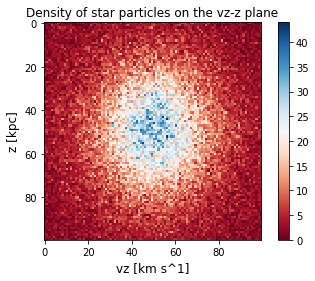

In [36]:
plt.imshow(den, cmap=plt.cm.get_cmap('RdBu'))
plt.colorbar()
plt.xlabel('vz [km s^1]', fontsize=12)
plt.ylabel('z [kpc]', fontsize=12)
plt.title('Density of star particles on the vz-z plane')
plt.show()

In [ ]:
#This line finds the mean feh values for each 2d histogram bin

In [11]:
feh_don_mean, xedges1, yedges1, binnumber1 = stats.binned_statistic_2d(vz_don, z_don, feh_don, 'mean', range=[[-200, 200], [-1.5, 1.5]], bins=[100,100])

In [ ]:
#Find range where the bulk of the distribution of feh averages lies

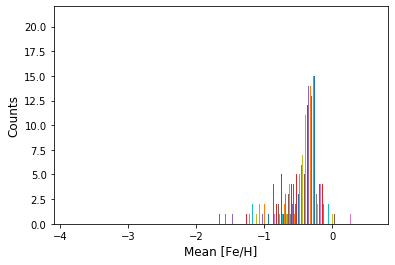

In [19]:
plt.hist(feh_don_mean, bins=100)
plt.xlabel('Mean [Fe/H]', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.show()

In [ ]:
#This range looks like it goes from -1.3 to 0.1. By setting my range, I can disconsider outliers.

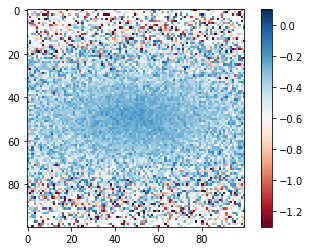

In [37]:
plt.imshow(feh_don_mean, cmap=plt.cm.get_cmap('RdBu'), vmin=-1.3, vmax=0.1)
plt.colorbar()
plt.show()